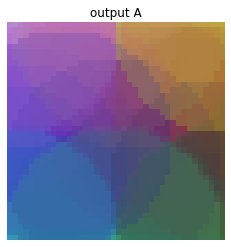

In [ ]:
#KOHONEN NETWORK
import matplotlib.pyplot as plt
import numpy as np


class SOFM:
    def __init__(self, lr, epochs):
        self.map = np.random.uniform(0, 1, size=(40, 40, 3))
        self.epochs = epochs
        self.landa = self.epochs / np.log(20)
        self.radius = 20
        self.lr = lr

    def update(self, minX, minY, x):
        for i in range(len(self.map)):
            for j in range(len(self.map[i])):
                interval = np.power(np.power((i - minX), 2) + np.power((j - minY), 2), 0.5)
                if interval < self.radius:
                    flow = np.exp(-interval / (2 * (self.radius ** 2)))
                    self.map[i][j] += flow * self.lr * (x - self.map[i][j])

    def train(self, input):
        for epoch in range(self.epochs):
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output A")
        plt.imshow(self.map)
        plt.show()


if __name__ == '__main__':
    data = np.ndarray((1600, 3), dtype=float)
    for i in range(len(data)):
        r = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        b = np.random.randint(0, 255)
        data[i] = [r, g, b]
    data = data / data.max()
    som = SOFM(0.1, 4800)
    som.train(data)



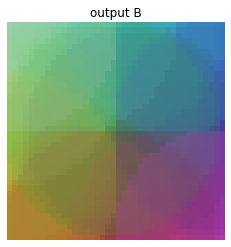

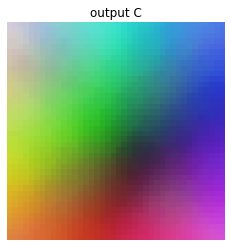

In [2]:
#Edited NETWORK(changbale learning rate)
import matplotlib.pyplot as plt
import numpy as np


class SOFM:
    def __init__(self, lr, epochs):
        self.map = np.random.uniform(0, 1, size=(40, 40, 3))
        self.epochs = epochs
        self.landa = self.epochs / np.log(20)
        self.radius = 20
        self.lr = lr

    def update_weights(self, minX, minY, x):
        for i in range(len(self.map)):
            for j in range(len(self.map[i])):
                dist = np.power(np.power((i - minX), 2) + np.power((j - minY), 2), 0.5)
                if dist < self.radius:
                    influence = np.exp(-dist / (2 * (self.radius ** 2)))
                    self.map[i][j] += influence * self.lr * (x - self.map[i][j])

    def train1(self, input):
        for epoch in range(self.epochs):
            self.lr = 0.1 * np.exp(-epoch / self.landa)
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update_weights(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output B")
        plt.imshow(self.map)
        plt.show()

    def train2(self, input):
        for epoch in range(self.epochs):
            self.lr = 0.1 * np.exp(-epoch / self.landa)
            self.radius = 20 * np.exp(-epoch / self.landa)
            data = input[epoch % 1600]
            interval = float("inf")
            for i in range(len(self.map)):
                for j in range(len(self.map[i])):
                    if np.sqrt(np.sum(np.power((self.map[i][j] - data), 2 ))) < interval:
                        interval = np.sqrt(np.sum(np.power((self.map[i][j] - data), 2)))
                        X_min, Y_min = (i, j)
            self.update_weights(X_min, Y_min, data)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.title("output C")
        plt.imshow(self.map)
        plt.show()


if __name__ == '__main__':
    data = np.ndarray((1600, 3), dtype=float)
    for i in range(len(data)):
        r = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        b = np.random.randint(0, 255)
        data[i] = [r, g, b]
    data = data / data.max()
    som = SOFM(0.04, 3200)
    som.train1(data)
    som.train2(data)
